In [3]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Make sure you have the required NLTK packages
nltk.download('punkt')
nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Include punctuation in the set of characters to be removed
stop_words.update(string.punctuation)

# Load the data
df = pd.read_csv('text01.txt', sep='\t')

# Function to remove stopwords and punctuation
def remove_stopwords_and_punctuation(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [word for word in word_tokens if not word.lower() in stop_words]
    return ' '.join(filtered_sentence)

# Apply the function to remove stopwords and punctuation
df['Text'] = df['Text'].apply(remove_stopwords_and_punctuation)

# Display the dataframe
print(df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


                                                Text  Label
0  starting routine morning jogs Emily found slee...      0
1  Implementing bedtime ritual includes reading m...      0
2  Sarah 's decision cut late-night snacks focus ...      0
3  John noticed marked improvement sleep began pr...      0
4  Regular cycling boosted Laura 's cardiovascula...      0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
print(df.head(10))

                                                Text  Label
0  starting routine morning jogs Emily found slee...      0
1  Implementing bedtime ritual includes reading m...      0
2  Sarah 's decision cut late-night snacks focus ...      0
3  John noticed marked improvement sleep began pr...      0
4  Regular cycling boosted Laura 's cardiovascula...      0
5  Switching diet rich fruits vegetables lean pro...      0
6  resolving workplace conflicts Anna found anxie...      0
7  Regular weekend hikes became way Tom stay acti...      0
8  Incorporating strength training routine helped...      0
9  maintaining consistent sleep schedule even wee...      0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.20, random_state=42, shuffle = True)

# Convert text data into numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test_counts)

# Calculate and print the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.929


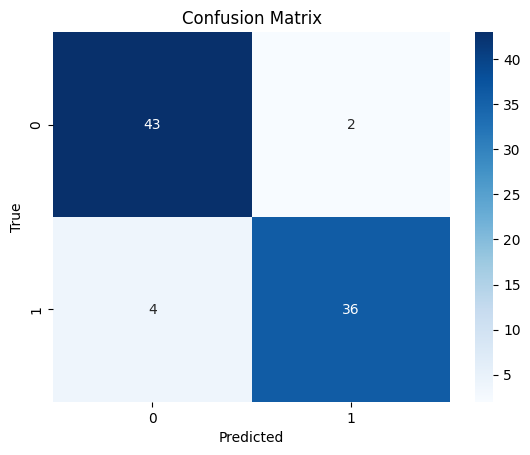

In [13]:
# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()